In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.49


In [3]:
Box?

Init signature:
Box(
    parent,
    x,
    y,
    angle=0,
    width=1,
    height=1,
    name=None,
    angularDamping=None,
    linearDamping=None,
    restitution=None,
    friction=None,
    density=None,
    color='b',
    plot_F_scale=None,
)
Docstring:      <no docstring>
File:           /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/RobotSim373/robotsim.py
Type:           type
Subclasses:     

In [4]:
def build(robot):
    
    center_y=22
    center_x=17.5
    
    
    box1=Box(robot,center_x+.6,center_y,angle=90,name='right')  # location given, width=height=1.0 default
    box2=Box(robot,center_x-.6,center_y,angle=90,name='left')
    box3=Box(robot,center_x+.6,center_y-1.1,angle=90,name='top')  # location given, width=height=1.0 default
    box4=Box(robot,center_x-.6,center_y-1.1,angle=90,name='bottom')

    connect(box1,box2,'weld')
    connect(box2,box3,'weld')
    connect(box3,box4,'weld')

    return robot



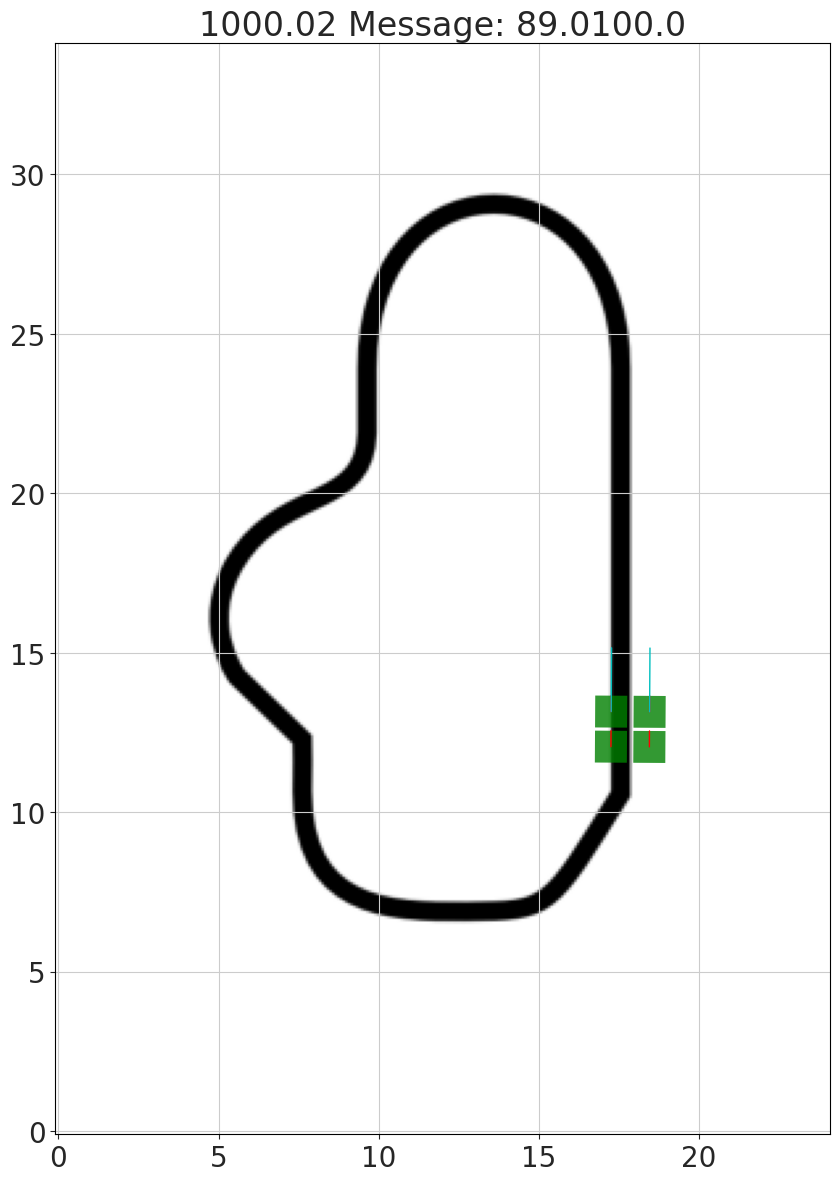

In [5]:
def act_forward_line(t,robot):

    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)

    scale=1
    if cl[0]<50:
        robot['left'].F=-1/scale
    else:
        robot['left'].F=4/scale
            
    if cr[0]<50:
        robot['right'].F=-1/scale
    else:
        robot['right'].F=4/scale
        
    
        
    robot.message=str(cl[0])+str(cr[0])

env=Environment(image='images/track.png',
               linearDamping=10)  # size of the environment
robot=Robot(env)

robot=build(robot)

run_sim(env,act_forward_line,
        total_time=1000,  # seconds
        dt=1/60,
        dt_display=5,  # make this larger for a faster display
       )

# State Machine Logic

In [68]:
def force_up(t,robot):
    robot['left'].F=100
    robot['right'].F=100

def force_down(t,robot):
    robot['left'].F=-100
    robot['right'].F=-100
    
def close_to_ceiling(t,robot):
    if robot['left'].y>30:
        return True
    
def close_to_floor(t,robot):
    if robot['left'].y<5:
        return True

In [69]:
state_machine=StateMachine(
    {
     'moving_up':([force_up,close_to_ceiling],'moving_down'),
     'moving_down':([force_down,close_to_floor],'_end_simulation'),
    },
    first_state='moving_up'
)

def monitor(t,robot):
    robot.message=robot.controller.current_state  

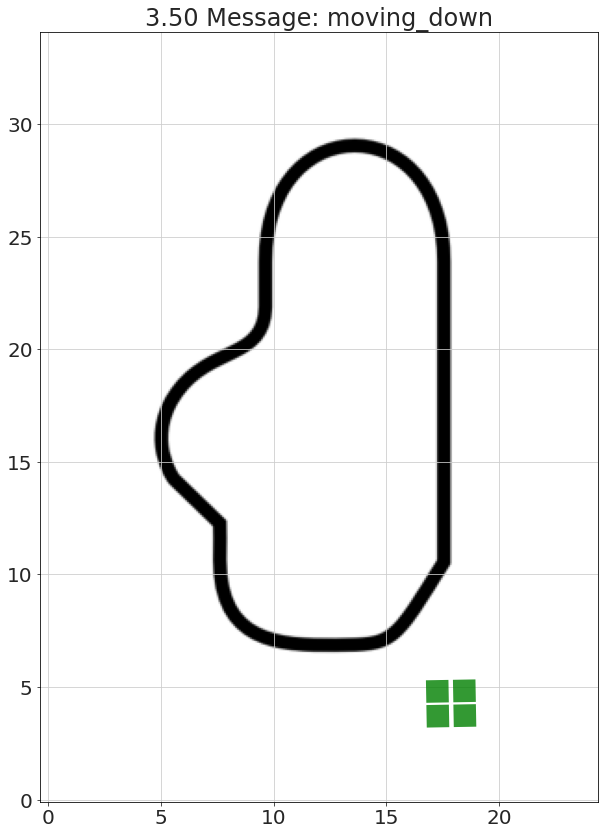

In [70]:

env=Environment(image='images/track.png',
               linearDamping=10)  # size of the environment
robot=Robot(env)

robot=build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor



run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        plot_orientation=False,
       )    


### back to line following

In [73]:
def force_up(t,robot):
    robot['left'].F=4
    robot['right'].F=4

def force_left(t,robot):
    robot['left'].F=-1
    robot['right'].F=4

def force_right(t,robot):
    robot['left'].F=-1
    robot['right'].F=4


def on_black(t,robot):
    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)
    if cl[0]<50:
        return 'adjust_left'
    
    if cr[0]<50:
        return 'adjust_right'

def on_white(t,robot):
    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)
    if cl[0]>50 and cr[0]<50:
        return True
    else:
        return False
    
    
state_machine=StateMachine(
    {
     'forward':([force_up,on_black],'_end_simulation'),
     'adjust_left':([force_left,on_white],'forward'),
     'adjust_right':([force_right,on_white],'forward'),
    },
    first_state='forward'
)

def monitor(t,robot):
    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)
    
    robot.message=robot.controller.current_state + str(cl[0])+str(cr[0])   




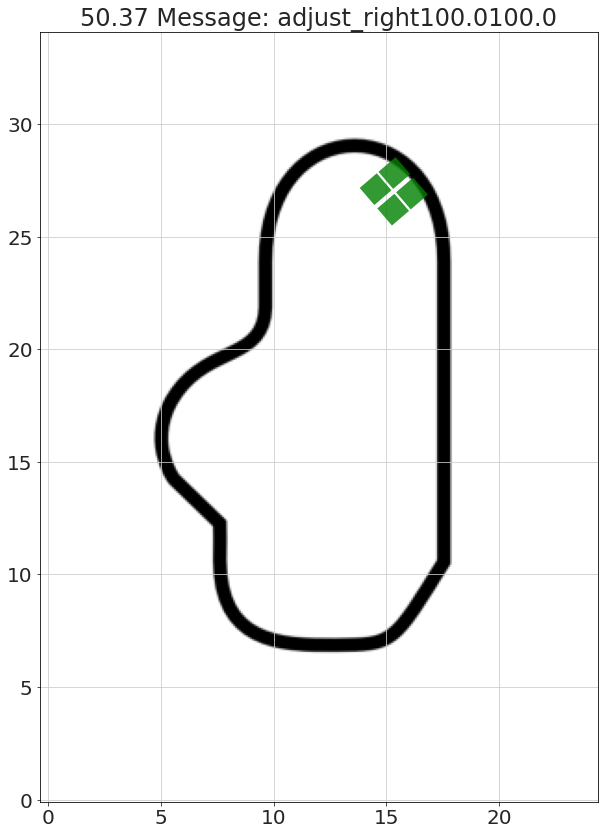

In [75]:

env=Environment(image='images/track.png',
               linearDamping=10)  # size of the environment
robot=Robot(env)

robot=build(robot)

robot.controller=Controller(robot,state_machine)
robot.controller.monitor=monitor



run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=2,  # make this larger for a faster display
        plot_orientation=False,
       )    
